In [1]:
#############################################################################################################################################################
##########################################Introduction to Neural Networks Project############################################################################
#############################################################################################################################################################

# **Data Description:**
Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?


The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Know your data: https://www.kaggle.com/barelydedicated/bank-
customer-churn-modeling.

# **Context:**
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a
customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

# Setup Environment and Load Necessary Packages

In [34]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from sklearn import metrics, model_selection, preprocessing, pipeline, compose

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Data Preparation
o Loading Data

o Data Representation & Feature Engineering

o Creating Train and Validation Set


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
bank_dataframe = pd.read_csv('/content/drive/My Drive/bank.csv', index_col='RowNumber')

In [7]:
bank_dataframe.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
bank_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [27]:
def preprocess_features(bank_dataframe):
  selected_features = bank_dataframe[[
  "CreditScore"                                
  ,"Geography"                                
  ,"Gender"                                
  ,"Age"                                
  ,"Tenure"                                
  ,"Balance"                                
  ,"NumOfProducts"                                
  ,"HasCrCard"                                
  ,"IsActiveMember"                                
  ,"EstimatedSalary"                    
  ]]

  processed_features = selected_features.copy()

  Country_LabelEncoder = preprocessing.LabelEncoder()
  processed_features["Geography"] = Country_LabelEncoder.fit_transform(processed_features["Geography"])

  Gender_LabelEncoder = preprocessing.LabelEncoder()
  processed_features["Gender"] = Gender_LabelEncoder.fit_transform(processed_features["Gender"])

  
  encodingPipeline = pipeline.Pipeline(
      [('Categorizer', compose.ColumnTransformer(
          [
           ('Geography One Hot Encoder', preprocessing.OneHotEncoder(categories='auto', drop='first'),[1]),
           ('Gender One Hot Encoder', preprocessing.OneHotEncoder(categories='auto', drop = 'first'),[2])
          ] , remainder='passthrough', n_jobs=1)),
       ('Normalizer', preprocessing.StandardScaler())      
      ]
  )

  processed_features = encodingPipeline.fit_transform(processed_features)
  

  return processed_features

def preprocess_targets(bank_dataframe):
  output_targets = pd.DataFrame()
  output_targets["Exited"] = bank_dataframe["Exited"]

  return output_targets


In [22]:
def get_train_test_data(X, y, test_size, random_state):

  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size = test_size, random_state = random_state)

  return X_train, X_test, y_train, y_test

In [29]:
X = preprocess_features(bank_dataframe)
y = preprocess_targets(bank_dataframe)

X_train, X_test, y_train, y_test = get_train_test_data(X, y, 0.2, 0)

In [30]:
print(f'train shape: {X_train.shape}, {y_train.shape}')
print(f'test shape: {X_test.shape}, {y_test.shape}')

train shape: (8000, 11), (8000, 1)
test shape: (2000, 11), (2000, 1)


# Model Creation

o Write & Configure Model

o Compile Model

o Build Model & Checking Summary


In [36]:
def build_nn_classifier_model():

  classifier_model = Sequential()
  classifier_model.add(Dense(activation = 'relu', input_dim = 11, units=6))
  classifier_model.add(Dropout(rate=0.1))
  classifier_model.add(Dense(6, activation='sigmoid'))
  classifier_model.add(Dropout(rate=0.1))
  classifier_model.add(Dense(1, activation = 'sigmoid'))
  

  print(classifier_model.summary())

  return classifier_model

def compile_nn_classifier_model(model, optimizer, loss, metrics):

  model.compile(optimizer= optimizer, loss = loss, metrics = metrics)

  return model

In [37]:
classifier_model = build_nn_classifier_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
classifier_model = compile_nn_classifier_model(classifier_model, optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training and Evaluation

o Reason & Visualize Model Performance

o Evaluate Model on Test Set


In [46]:
def train_nn_classifier_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size = batch_size)
  return model

In [47]:
classifier_model = train_nn_classifier_model(classifier_model, X_train,y_train, X_test, y_test, 150, 32)

Train on 8000 samples, validate on 2000 samples
Epoch 1/150
8000/8000 [==============================] - 0s 46us/step - loss: 0.3631 - accuracy: 0.8503 - val_loss: 0.3382 - val_accuracy: 0.8610
Epoch 2/150
8000/8000 [==============================] - 0s 51us/step - loss: 0.3632 - accuracy: 0.8516 - val_loss: 0.3382 - val_accuracy: 0.8605
Epoch 3/150
8000/8000 [==============================] - 0s 48us/step - loss: 0.3615 - accuracy: 0.8510 - val_loss: 0.3381 - val_accuracy: 0.8610
Epoch 4/150
8000/8000 [==============================] - 0s 52us/step - loss: 0.3569 - accuracy: 0.8543 - val_loss: 0.3375 - val_accuracy: 0.8610
Epoch 5/150
8000/8000 [==============================] - 0s 51us/step - loss: 0.3636 - accuracy: 0.8514 - val_loss: 0.3382 - val_accuracy: 0.8615
Epoch 6/150
8000/8000 [==============================] - 0s 48us/step - loss: 0.3612 - accuracy: 0.8503 - val_loss: 0.3382 - val_accuracy: 0.8610
Epoch 7/150
8000/8000 [==============================] - 0s 50us/step - loss

In [70]:
accuracy = classifier_model.history.history['accuracy']
val_accuracy = classifier_model.history.history['val_accuracy']

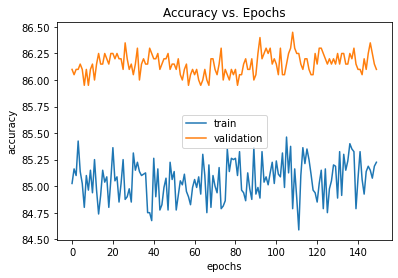

In [71]:
plt.plot(np.array(accuracy) * 100)
plt.plot(np.array(val_accuracy) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('Accuracy vs. Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [48]:
def pred_nn_classifier(model, X_test):

  y_pred = model.predict(X_test)

  return y_pred

In [52]:
y_pred = pred_nn_classifier(classifier_model, X_test)
print(y_pred)
print(y_pred>0.5)

[[0.29092085]
 [0.27075976]
 [0.1790601 ]
 ...
 [0.1811955 ]
 [0.1086944 ]
 [0.25510737]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [55]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred.astype(int))

print(confusion_matrix)

[[1595    0]
 [ 405    0]]
